In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost
from xgboost import XGBClassifier

from sklearn import model_selection
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

plt.rcParams['figure.figsize'] = (12, 9)
plt.style.use('ggplot')

import shap
shap.initjs()

from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

/Users/nitanshjain/.local/share/virtualenvs/Shopper_Intent_Prediction-jr_Cp9Sf/lib/python3.10/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/Users/nitanshjain/.local/share/virtualenvs/Shopper_Intent_Prediction-jr_Cp9Sf/lib/python3.10/site-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#depr

In [2]:
shop_df = pd.read_csv('/Users/nitanshjain/Documents/Projects/Shopper_Intent_Prediction/data/shopper_data_slm_feat.csv')
shop_df.head(1)

,session_id_hash,product_action,conversion_class,reduced_time,HVGms_edges,pattern_hvg_4_nodes,pattern_hvg_5_nodes,unigram,bigram,trigram,unigram_prob_freq,bigram_prob_freq,trigram_prob_freq,pattern_hvg_4_nodes_prob_freq,pattern_hvg_5_nodes_prob_freq,unigram_entropy,bigram_entropy,trigram_entropy,pattern_hvg_4_nodes_entropy,pattern_hvg_5_node_entropy,"(1,)","(2,)","(6,)","(3,)","(4,)","(1, 1)","(1, 2)","(2, 6)","(6, 1)","(2, 1)","(2, 2)","(2, 3)","(3, 1)","(6, 3)","(3, 2)","(1, 4)","(4, 1)","(1, 3)","(3, 3)","(1, 6)","(6, 2)","(4, 4)","(3, 4)","(2, 4)","(4, 2)","(6, 6)","(1, 1, 1)","(1, 1, 2)","(1, 2, 6)","(2, 6, 1)","(6, 1, 2)","(1, 2, 1)","(2, 1, 1)","(2, 1, 2)","(1, 2, 2)","(2, 2, 2)","(2, 2, 1)","(1, 2, 3)","(2, 3, 1)","(3, 1, 2)","(2, 2, 3)","(3, 1, 1)","(2, 6, 3)","(6, 3, 2)","(3, 2, 2)","(6, 3, 1)","(1, 1, 4)","(1, 4, 1)","(4, 1, 2)","(2, 1, 4)","(4, 1, 4)","(2, 1, 3)","(1, 3, 3)","(3, 3, 3)","(3, 3, 2)","(3, 2, 1)","(4, 1, 1)","(3, 3, 1)","(2, 3, 2)","(3, 2, 3)","(1, 1, 6)","(1, 6, 2)","(6, 2, 1)","(6, 1, 1)","(3, 1, 4)","(2, 3, 3)","(6, 2, 2)","(2, 6, 2)","(2, 1, 6)","(6, 1, 6)","(1, 1, 3)","(1, 4, 4)","(4, 4, 1)","(6, 1, 4)","(4, 4, 4)","(6, 1, 3)","(1, 3, 1)","(6, 2, 6)","(3, 1, 3)","(6, 2, 3)","(3, 1, 6)","(2, 3, 4)","(3, 4, 1)","(1, 2, 4)","(2, 4, 1)","(2, 2, 6)","(1, 4, 2)","(4, 2, 1)","(4, 2, 4)","(6, 3, 3)","(1, 3, 2)","(2, 2, 4)","(3, 2, 4)","(3, 3, 4)","(4, 1, 3)","(4, 2, 2)","(2, 4, 2)","(4, 4, 2)","(3, 4, 2)","(1, 6, 1)","(2, 6, 6)","(6, 6, 1)","(4, 2, 3)","(6, 6, 2)","(3, 2, 6)","(6, 2, 4)",A4,D4,E4,C4,F4,B4,E5,T5,O5,B5,N5,Q5,V5,G5,U5,A5,L5,P5,S5,R5,K5,C5,D5,H5,J5,M5,F5,I5
0,00014c4428e61aca7e64be1064d2b6cf49233cfb,"[1, 1, 1, 1, 1, 1, 2, 6, 1, 2, 1, 1, 1, 1, 1, 1]",NC,"[0.04219143180815674, 0.10998035246968647, 0.0...","[(10, 11), (11, 12), (11, 13), (11, 14), (9, 1...","['A4', 'D4', 'E4', 'A4', 'D4']","['E5', 'T5', 'O5', 'E5', 'B5']","[(1,), (1,), (1,), (1,), (1,), (1,), (2,), (6,...","[(1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 2...","[(1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (...","{(1,): 0.8125, (2,): 0.125, (6,): 0.0625}","{(1, 1): 0.6666666666666666, (1, 2): 0.1333333...","{(1, 1, 1): 0.5714285714285714, (1, 1, 2): 0.0...","{'A4': 0.4, 'D4': 0.4, 'E4': 0.2}","{'E5': 0.4, 'T5': 0.2, 'O5': 0.2, 'B5': 0.2}",0.601924,0.601924,1.450805,1.05492,1.332179,0.8125,0.125,0.0625,0.0,0.0,0.666667,0.133333,0.066667,0.066667,0.066667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.571429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.4,0.2,0.0,0.0,0.0,0.4,0.2,0.2,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
print(shop_df.columns)

Index(['session_id_hash', 'product_action', 'conversion_class', 'reduced_time',
       'HVGms_edges', 'pattern_hvg_4_nodes', 'pattern_hvg_5_nodes', 'unigram',
       'bigram', 'trigram',
       ...
       'S5', 'R5', 'K5', 'C5', 'D5', 'H5', 'J5', 'M5', 'F5', 'I5'],
      dtype='object', length=154)


In [4]:
shop_df.drop(['session_id_hash', 'product_action', 'reduced_time', 'HVGms_edges', 'pattern_hvg_4_nodes', 'pattern_hvg_5_nodes', 'unigram', 'bigram', 'trigram', 'unigram_prob_freq', 'bigram_prob_freq', 'trigram_prob_freq', 'pattern_hvg_4_nodes_prob_freq', 'pattern_hvg_5_nodes_prob_freq'], axis=1, inplace=True)
le = LabelEncoder()
shop_df['conversion_class'] = le.fit_transform(shop_df['conversion_class'])
print(shop_df.shape)

(10392, 140)


In [9]:
x = shop_df.drop(['conversion_class'], axis=1)
y = shop_df.conversion_class

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.02, random_state=42, stratify=y)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(10184, 139) (208, 139) (10184,) (208,)


In [10]:
params = {
    "eta": 0.01,
    "objective": "binary:logistic",
    "subsample": 0.5,
    "base_score": np.mean(y_train),
    "eval_metric": "auc"
}
xgb = XGBClassifier(**params)
sm = SMOTE(random_state = 2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())
model = xgb.fit(x_train_res, y_train_res)

In [11]:
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.38      0.50      0.43        10
           1       0.97      0.96      0.97       198

    accuracy                           0.94       208
   macro avg       0.68      0.73      0.70       208
weighted avg       0.95      0.94      0.94       208



In [12]:
explainer = shap.TreeExplainer(model.predict, x_test)
shap_values = explainer.shap_values(x_test)

Using 208 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
  0%|          | 0/208 [00:00<?, ?it/s]

100%|██████████| 208/208 [16:03<00:00,  4.63s/it]


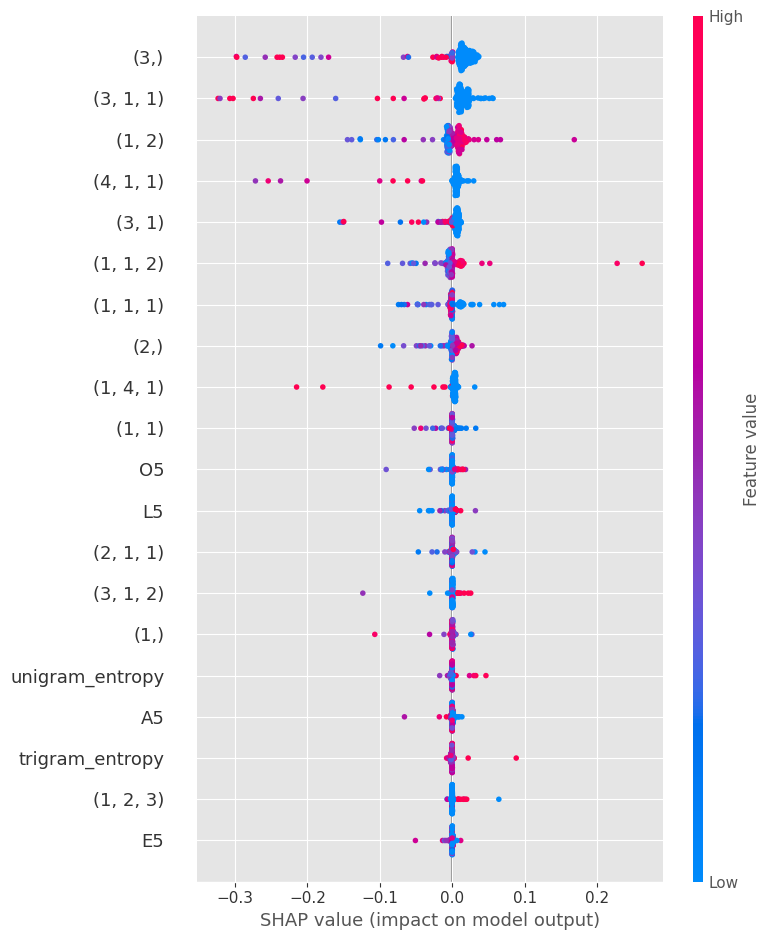

In [19]:
shap.summary_plot(shap_values, x_test)

(208, 139)